In [1]:
!pip3 install onnx
!pip3 install keras2onnx
!pip3 install onnxruntime

     |████████████████████████████████| 7.1MB 6.5MB/s 
     |████████████████████████████████| 215kB 6.4MB/s 
     |████████████████████████████████| 51kB 23.4MB/s 
     |████████████████████████████████| 3.2MB 6.8MB/s 


new_device


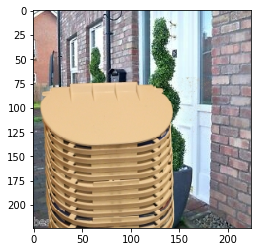

In [7]:
#getting started file to load from onnx model
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.resnet50 import preprocess_input
#import keras2onnx
import onnxruntime
import onnx
import numpy as np
import cv2
from matplotlib import pyplot as plt
 # make sure the image is in img_path
img=cv2.imread('trial.jpg')
img_size = 224
width,height=(224,224)
img= cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img = cv2.resize(img,(width,height))

x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
onnx_model = onnx.load('model.onnx')

content = onnx_model.SerializeToString()
sess = onnxruntime.InferenceSession(content)
x = x if isinstance(x, list) else [x]
feed = dict([(input.name, x[n]) for n, input in enumerate(sess.get_inputs())])
pred_onnx = sess.run(None, feed)
classes=['no_device','old_device','new_device']
print (classes[np.argmax(pred_onnx)])
plt.imshow(img)
plt.show()